

Build **kNN** and **logistic regression** classifiers using sklearn library to predict "passed" (label variable) by using given data. 
- Start the project with data processing such as converting non-numeric values to numerical ones,  data normalization, etc.
- Explore and analyze the data using feature visualization such as correlation heatmap, and distribution plots by commenting on your findings. Choose min. 3 features for the visualization step. 
- Then, shuffle and split your data into train and test sets randomly, with a ratio of 70:30. (Write your own shuffling and spliting code, do not use predefined function train_test_split).
- Build your models (with proper comments and explanations) using the training set.
- Compare these 2 classification models according to their accuracies (you can print accuracy values in a single table as a comprehensive view) over the test set. Comment on their classification performance.
- Plot confusion matrices for your models over the test set, and comment on the outcomes. 
- Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate/comment the prediction performance of each classifier. 

Notes:

* Choose the optimal k value using Minkowski distance (by trying two different p-values) for the kNN model.


* **Don't forget to add comments to your code lines to explain how your program works, and your intentions behind it. Also, do not forget to comment on the outcomes and comparisons.** 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("data.csv")
data["school"] = np.where(data["school"]=="GP",0,1)   #Converting non-numeric values to numerical values by np.where() for binaries
data["sex"] = np.where(data["sex"]=="F",0,1)
data["address"] = np.where(data["address"]=="U",0,1)
data["famsize"] = np.where(data["famsize"]=="LE3",0,1)
data["Pstatus"] = np.where(data["Pstatus"]=="A",0,1)
data["schoolsup"] = np.where(data["schoolsup"]=="no",0,1)
data["famsup"] = np.where(data["famsup"]=="no",0,1)
data["paid"] = np.where(data["paid"]=="no",0,1)
data["activities"] = np.where(data["activities"]=="no",0,1)
data["nursery"] = np.where(data["nursery"]=="no",0,1)
data["higher"] = np.where(data["higher"]=="no",0,1)
data["internet"] = np.where(data["internet"]=="no",0,1)
data["romantic"] = np.where(data["romantic"]=="no",0,1)
data["passed"] = np.where(data["passed"]=="no",0,1)
data.loc[data["Mjob"]=="teacher","Mjob"] = 0         #Converting non-numeric values to numerical values by df.loc[] for nominals
data.loc[data["Mjob"]=="health","Mjob"] = 1
data.loc[data["Mjob"]=="services","Mjob"] = 2
data.loc[data["Mjob"]=="at_home","Mjob"] = 3
data.loc[data["Mjob"]=="other","Mjob"] = 4
data.loc[data["Fjob"]=="teacher","Fjob"] = 0
data.loc[data["Fjob"]=="health","Fjob"] = 1
data.loc[data["Fjob"]=="services","Fjob"] = 2
data.loc[data["Fjob"]=="at_home","Fjob"] = 3
data.loc[data["Fjob"]=="other","Fjob"] = 4
data.loc[data["reason"]=="home","reason"] = 0
data.loc[data["reason"]=="reputation","reason"] = 1
data.loc[data["reason"]=="course","reason"] = 2
data.loc[data["reason"]=="other","reason"] = 3
data.loc[data["guardian"]=="mother","guardian"] = 0
data.loc[data["guardian"]=="father","guardian"] = 1
data.loc[data["guardian"]=="other","guardian"] = 2
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,18,0,1,0,4,4,3,0,...,0,0,4,3,4,1,1,3,6,0
1,0,0,17,0,1,1,1,1,3,4,...,1,0,5,3,3,1,1,3,4,0
2,0,0,15,0,0,1,1,1,3,4,...,1,0,4,3,2,2,3,3,10,1
3,0,0,15,0,1,1,4,2,1,2,...,1,1,3,2,2,1,1,5,2,1
4,0,0,16,0,1,1,3,3,4,4,...,0,0,4,3,2,1,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,0,0,2,2,2,2,...,0,0,5,5,4,4,5,4,11,0
391,1,1,17,0,0,1,3,1,2,2,...,1,0,2,4,5,3,4,2,3,1
392,1,1,21,1,1,1,1,1,4,4,...,0,0,5,5,3,3,3,3,3,0
393,1,1,18,1,0,1,3,2,2,4,...,1,0,4,4,1,3,4,5,0,1


There is more relationship between Fedu and Medu than other features


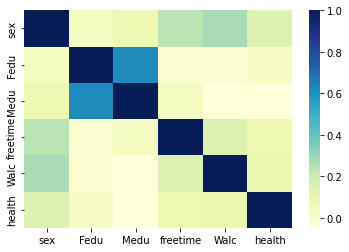

In [2]:
print("There is more relationship between Fedu and Medu than other features")
sns.heatmap(data[["sex","Fedu","Medu","freetime","Walc","health"]].corr(), cmap="YlGnBu")
plt.show()

In [3]:
x_columns = data.loc[:,data.columns != "passed"].columns  #Shuffling values by sample df.sample().And splitting itt with 0.7(train) 0.3(test) ratio 
data_train = data.sample(frac=.7,random_state = 4) 
data_test = data.drop(data_train.index) 
x_train = data_train[x_columns] 
x_test = data_test[x_columns] 
y_train = data_train["passed"] 
y_test = data_test["passed"]

Best k value is 9


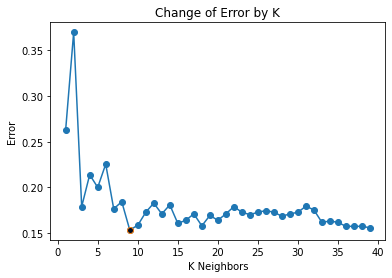

In [4]:
##KNN Classifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score      #Building KNN model.Trying for k(0-30)
clf = KNN()
clf.fit(x_train,y_train)
k = range(1,40)
errorList = []
scores = []
for i in k:
    clf = KNN(n_neighbors=i,metric="minkowski")
    clf.fit(x_train,y_train)
    temp = clf.predict(x_test)
    temp = f1_score(temp,y_test)
    scores.append(temp)    #Adding all scores to list.Further I will compare with LogisticRegression score
    error = 1 - temp
    errorList.append(error)
minError = min(errorList)
minErrorK = errorList.index(min(errorList)) + 1
plt.ylabel("Error")
plt.xlabel("K Neighbors")
plt.title("Change of Error by K")
plt.plot(k,errorList,marker="o")
plt.plot(minErrorK,minError,marker="o",markerfacecolor="#000C1F")
print("Best k value is",minErrorK)

In [5]:
clf = KNN(n_neighbors = minErrorK) #Trying KNN with best k values that I found above
clf.fit(x_train,y_train)
test_predict = clf.predict(x_test)
f1_score(test_predict,y_test)

0.8465608465608465

In [6]:
##Logistic Regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(data_train[x_columns],data_train["passed"])
from sklearn.model_selection import cross_val_score
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)    #Making predictions with Logistic Regression and calculating accuracy
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48        32
           1       0.81      0.83      0.82        87

    accuracy                           0.73       119
   macro avg       0.65      0.65      0.65       119
weighted avg       0.73      0.73      0.73       119



KNN is more accurate than Logistic Regression


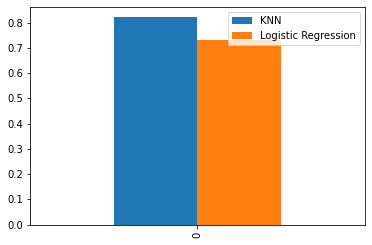

In [7]:
from sklearn.metrics import accuracy_score
newdata ={"KNN":[np.mean(scores)],"Logistic Regression":[accuracy_score(y_test,prediction)]}
newdf = pd.DataFrame(newdata)
newdf.plot(kind="bar")
print("KNN is more accurate than Logistic Regression")

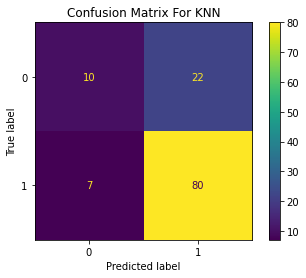

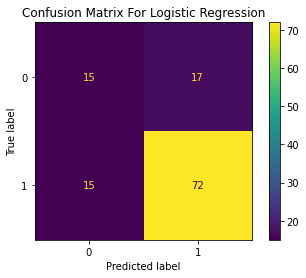

In [8]:
from sklearn.metrics import plot_confusion_matrix
knnmatrix = plot_confusion_matrix(clf,x_test,y_test)   #Plotting confusion matrix for KNN.
knnmatrix.ax_.set_title("Confusion Matrix For KNN")
lrmatrix = plot_confusion_matrix(lr,x_test,y_test)     #Plotting confusion matrix for Logistic Regression.
lrmatrix.ax_.set_title("Confusion Matrix For Logistic Regression")
plt.show()

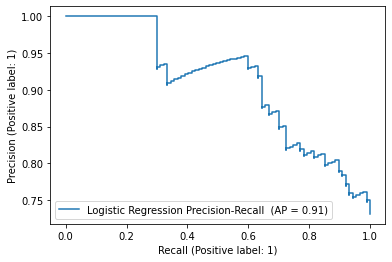

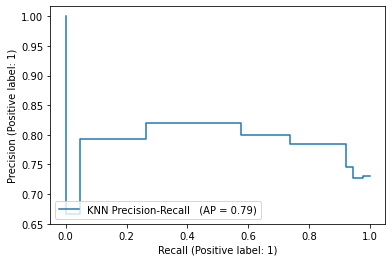

In [9]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(lr, x_test, y_test, name="Logistic Regression Precision-Recall ")#Plotting PR curve for Logistic Regression
display = PrecisionRecallDisplay.from_estimator(clf,x_test,y_test,name="KNN Precision-Recall  ")#Plotting PR curve for KNN